<a href="https://colab.research.google.com/github/kmyers111/ML-Models/blob/main/TitanticMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

from google.colab import files
import pandas as pd

uploaded = files.upload()


Saving train.csv to train.csv
Saving test.csv to test.csv


In [20]:
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:

test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


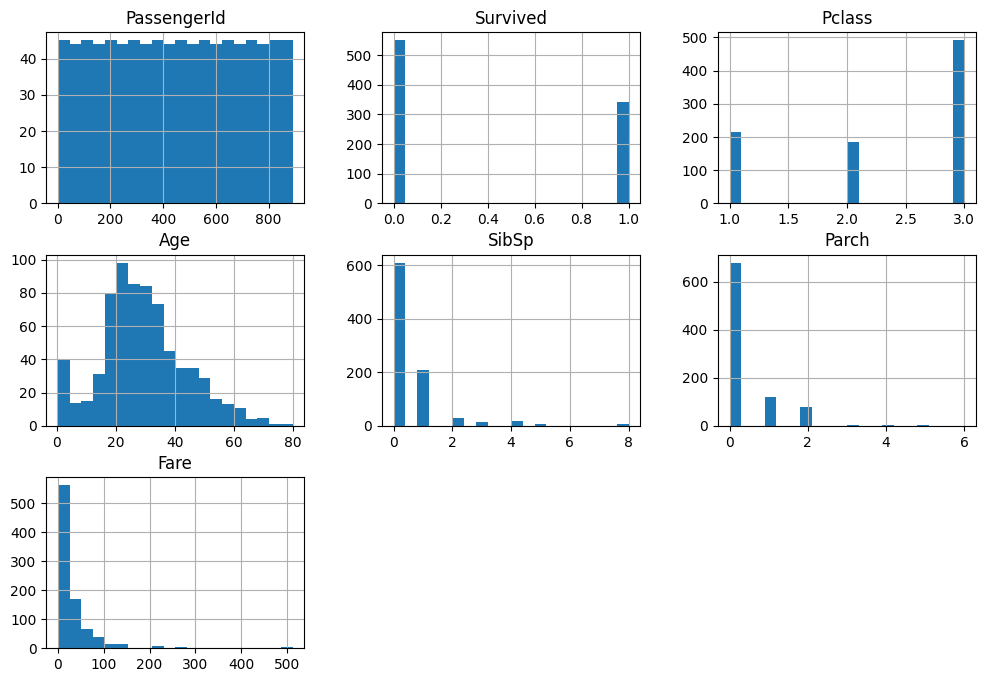

In [22]:
#Maps histograms of the training data
train_data.hist(bins=20, figsize=(12, 8))
plt.show()

In [23]:
#Basic information about the data
display(train_data.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
#Median grouped by survived
train_data.groupby("Survived").median(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,455.0,3.0,29.642093,0.0,0.0,10.5
1,439.5,2.0,29.642093,0.0,0.0,26.0


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Features of significance
features = ["Pclass", "Sex", "Age", "Fare"]

x = train_data[features].copy()
y = train_data["Survived"]

#Assigns sex (categories) to a value
x["Sex"] = x["Sex"].map({"male": 0, "female": 1})

#Assigns a mean value to missing ages
x['Age'].fillna(x['Age'].mean(), inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=23)

model = LogisticRegression()
model.fit(x_train, y_train)

acc = accuracy_score(y_test, model.predict(x_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 77.53%


/tmp/ipython-input-290453876.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Age'].fillna(x['Age'].mean(), inplace=True)
